## Experiment No. 1 - Implement simple logic network using Mc-Culloch Pitts (MP) neuron model

### Mc-Culloch Pitts (MP) neuron

The fundamental block of deep learning is artificial neuron i.e. it takes a weighted aggregate of inputs, applies a function and gives an output. The very first step towards the artificial neuron was taken by Warren McCulloch and Walter Pitts in 1943 inspired by neurobiology, created a model known as McCulloch-Pitts Neuron. [2]

- **Data** - Binary Input
- **Task** - Classification Binary Output (0 or 1)
- **Mathematical Model** - MP Neuron
- **Loss Function** - Mean Squared Error
- **Learning Algorithm** - Bruce Force
- **Model Evaluation** - Accuracy

## Algorithm
1. Import Library
2. Load the data
3. Train Test Split
4. Binarisation of data
5. MP Neuron Model
6. Training the Model
7. Testing the Model

### 1. Import Library

In [1]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

### 2. Load the data

In [2]:
breast_cancer = sklearn.datasets.load_breast_cancer()

#Converting the data to Pandas dataframe

data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
data['class']=breast_cancer.target
print(data.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [3]:
print(breast_cancer.target_names)
print(data['class'].value_counts())

print(data.groupby('class').describe())

['malignant' 'benign']
1    357
0    212
Name: class, dtype: int64
      mean radius                                                             \
            count       mean       std     min     25%     50%    75%    max   
class                                                                          
0           212.0  17.462830  3.203971  10.950  15.075  17.325  19.59  28.11   
1           357.0  12.146524  1.780512   6.981  11.080  12.200  13.37  17.85   

      mean texture             ... worst symmetry          \
             count       mean  ...            75%     max   
class                          ...                          
0            212.0  21.604906  ...       0.359225  0.6638   
1            357.0  17.914762  ...       0.298300  0.4228   

      worst fractal dimension                                                  \
                        count      mean       std      min       25%      50%   
class                                                           

### 3. Train Test Split

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop('class', axis = 1)
Y = data['class']

# after error add random_state=1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify = Y)

print(X_train.shape, X_test.shape)

print(Y_train.mean())
print(Y_test.mean())

(512, 30) (57, 30)
0.626953125
0.631578947368421


### 4. Binarisation of data

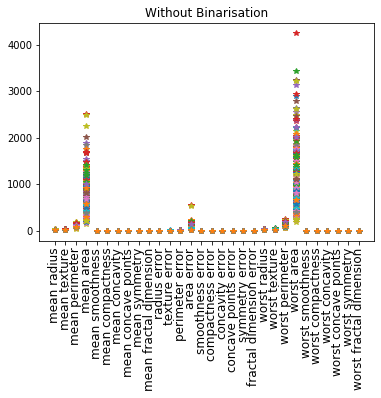

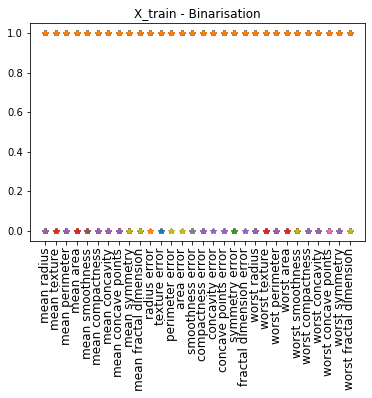

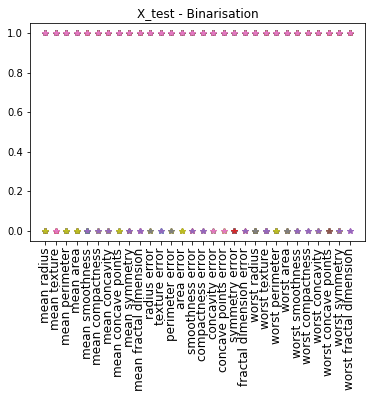

In [5]:
plt.plot(X_train.T,'*')
plt.xticks(rotation = 'vertical', fontsize = 'large')
plt.title('Without Binarisation')
plt.show()

#converting the input features to a binary format
X_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])
X_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])

plt.plot(X_binarised_train.T,'*')
plt.xticks(rotation = 'vertical', fontsize = 'large')
plt.title('X_train - Binarisation')
plt.show()

plt.plot(X_binarised_test.T,"*")
plt.xticks(rotation = 'vertical',fontsize = 'large')
plt.title('X_test - Binarisation')
plt.show()

# convert to np array 
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values

### 5. MP Neuron Model

In [6]:
class MPNeuron:
    
    def __init__(self):
        self.b = None
    
    def model(self, x):
        return(sum(x) >= self.b)
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y):
        accuracy = {}
        
        for b in range(X.shape[1]+1):
            self.b = b
            Y_pred = self.predict(X)
            accuracy[b] = accuracy_score(Y_pred, Y)
        
        best_b = max(accuracy, key = accuracy.get)
        self.b = best_b
        
        print('Optimal value of b is', best_b)
        print('Highest accuracy is', accuracy[best_b])

### 6. Training the Model

In [7]:
#Calling the class MPNeuron
mp_neuron = MPNeuron()

#Fitting the model
mp_neuron.fit(X_binarised_train, Y_train)

Optimal value of b is 28
Highest accuracy is 0.85546875


### 7. Testing the Model

In [8]:
#testing the model on the test data.
Y_test_pred = mp_neuron.predict(X_binarised_test)
accuracy_test = accuracy_score(Y_test_pred, Y_test)

#print the accuracy of the test data
print(accuracy_test)

0.8070175438596491


## Questions

**1. Explain Mc – Culloch Pitts Neuron architecture with neat figure.**

Ans:- 

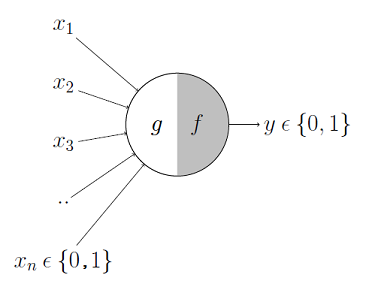

In [9]:
Image(filename="img/architecture.png")

<div align="center">Fig. 1. Architecture of MP Neuron[3]</div>

<div align="center">$$y = \sum_{i=1}^{n} x_i \geq b $$</div>

where $x$ is input or features, <br/>
b is threshold, <br/>
and, $y$ is output <br/>

In MP Neuron we just do sum of input and through training we find the best threshold point. Input and output values are binary.

**2. Realize AND-NOT function using MP neuron model.**

Ans:- 

<div align="center">AND function</div>

|   A   |   B   |   Y   |
| ----- |:-----:| -----:|
|   0   |   0   |   0   |
|   0   |   1   |   0   |
|   1   |   0   |   0   |
|   1   |   1   |   1   |

$$
y = 
\begin{cases}
0    &\text{ if $\sum x$ < 1} \\
1    &\text{ if $\sum x$ $\geq$ 1} \\
\end{cases}
$$
<br/>
<div align="center">NOT function</div>

|   A   |   Y   |
| ----- | -----:|
|   0   |   1   |
|   1   |   0   |

$$
y = 
\begin{cases}
0    &\text{ if $x$ = 1} \\
1    &\text{ if $x$ = 0} \\
\end{cases}
$$

**3. Draw structure of biological neuron and explain it.**

Ans:-

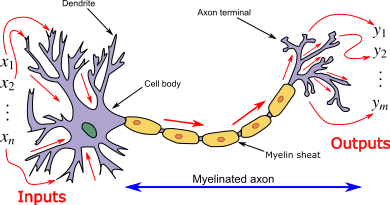

In [10]:
Image(filename="img/biological_neuron.png")

<div align="center">Fig. 2. Biological Neuron</div>

+ **Dendrite:** Receives signals from other neurons
+ **Soma:** Sums all the incoming signals
+ **Axon:** When a particular amount of input is received, then the cell fires. It transmits signal through axon to other cells

**4. Realize NAND function using MP neuron model.**

Ans:-
<div align="center">NAND function</div>

|   A   |   B   |   Y   |
| ----- |:-----:| -----:|
|   0   |   0   |   1   |
|   0   |   1   |   1   |
|   1   |   0   |   1   |
|   1   |   1   |   0   |

$$
y = 
\begin{cases}
0    &\text{ if $\sum x$ = 2} \\
1    &\text{ if $\sum x$ < 2} \\
\end{cases}
$$

**5. State advantages & applications of MP neuron model.**

Ans:- 

**Advantages**
1. Simple
2. Low Size
3. Plays with 0 and 1

**Applications**
1. Logic Gates
2. LBW
3. Breast Cancer

### References 
[1] https://github.com/hitanshu-mehta/predicting-type-of-breast-cancer/blob/master/MP_neuron.ipynb

[2] https://hackernoon.com/mcculloch-pitts-neuron-deep-learning-building-blocks-7928f4e0504d

[3] https://towardsdatascience.com/mcculloch-pitts-model-5fdf65ac5dd1

Author Name:- Hemant Ghuge <br/>
LinkedIn:- https://www.linkedin.com/in/hemantghuge/ <br/>
GitHub:- https://github.com/HemantGorakshGhuge <br/>